This tutorial reproduces the results of tutorial 4 on spinw.org. It is a Antiferromagnetic square lattice.

Get Packages

In [7]:
using Sunny, GLMakie, CairoMakie  

Define the lattice. Set up the lattice, the position of magnetic atoms, the symmetry inequivalent postions and the spin. Cu+ atoms have spin one and are located at the origin of the cell. The supercell is (2,2,1). "types" can be used to break symmetry between atoms and "subcrystal" can be used to reduce the unit cell to only one type of atom. Here it is trivial.

In [8]:
a=3.0
b=3.0
c=6.0


latvecs = lattice_vectors(a, b, c, 90, 90, 90) 
positions=[[0, 0, 0]]
types=["Cu1"]
Cu = Crystal(latvecs, positions; types)
cryst=subcrystal(Cu,"Cu1")
view_crystal(cryst)
print_symmetry_table(cryst,8)
sys=System(cryst, (2,2,1),[SpinInfo(1,S=1,g=2)], :dipole, seed=0)

Atom 1
Type 'Cu1', position [0, 0, 0], multiplicity 1
Allowed g-tensor: [A 0 0
                   0 A 0
                   0 0 B]
Allowed anisotropy in Stevens operators:
    c₁*𝒪[2,0] +
    c₂*𝒪[4,0] + c₃*𝒪[4,4] +
    c₄*𝒪[6,0] + c₅*𝒪[6,4]

Bond(1, 1, [1, 0, 0])
Distance 3, coordination 4
Connects 'Cu1' at [0, 0, 0] to 'Cu1' at [1, 0, 0]
Allowed exchange matrix: [A 0 0
                          0 B 0
                          0 0 C]

Bond(1, 1, [1, 1, 0])
Distance 4.2426406871193, coordination 4
Connects 'Cu1' at [0, 0, 0] to 'Cu1' at [1, 1, 0]
Allowed exchange matrix: [A C 0
                          C A 0
                          0 0 B]

Bond(1, 1, [2, 0, 0])
Distance 6, coordination 4
Connects 'Cu1' at [0, 0, 0] to 'Cu1' at [2, 0, 0]
Allowed exchange matrix: [A 0 0
                          0 B 0
                          0 0 C]

Bond(1, 1, [0, 0, 1])
Distance 6, coordination 2
Connects 'Cu1' at [0, 0, 0] to 'Cu1' at [0, 0, 1]
Allowed exchange matrix: [A 0 0
                      

System [Dipole mode]
Lattice (2×2×1)×1
Energy per site 0


Set up the exchanges. The nearest neigbour interaction is antiferromagnetic and the second nearest interation is antiferromagnetic. Randomize and minimize the energy of the system. "plot_spins" can be used to view if the resulting system is correct.

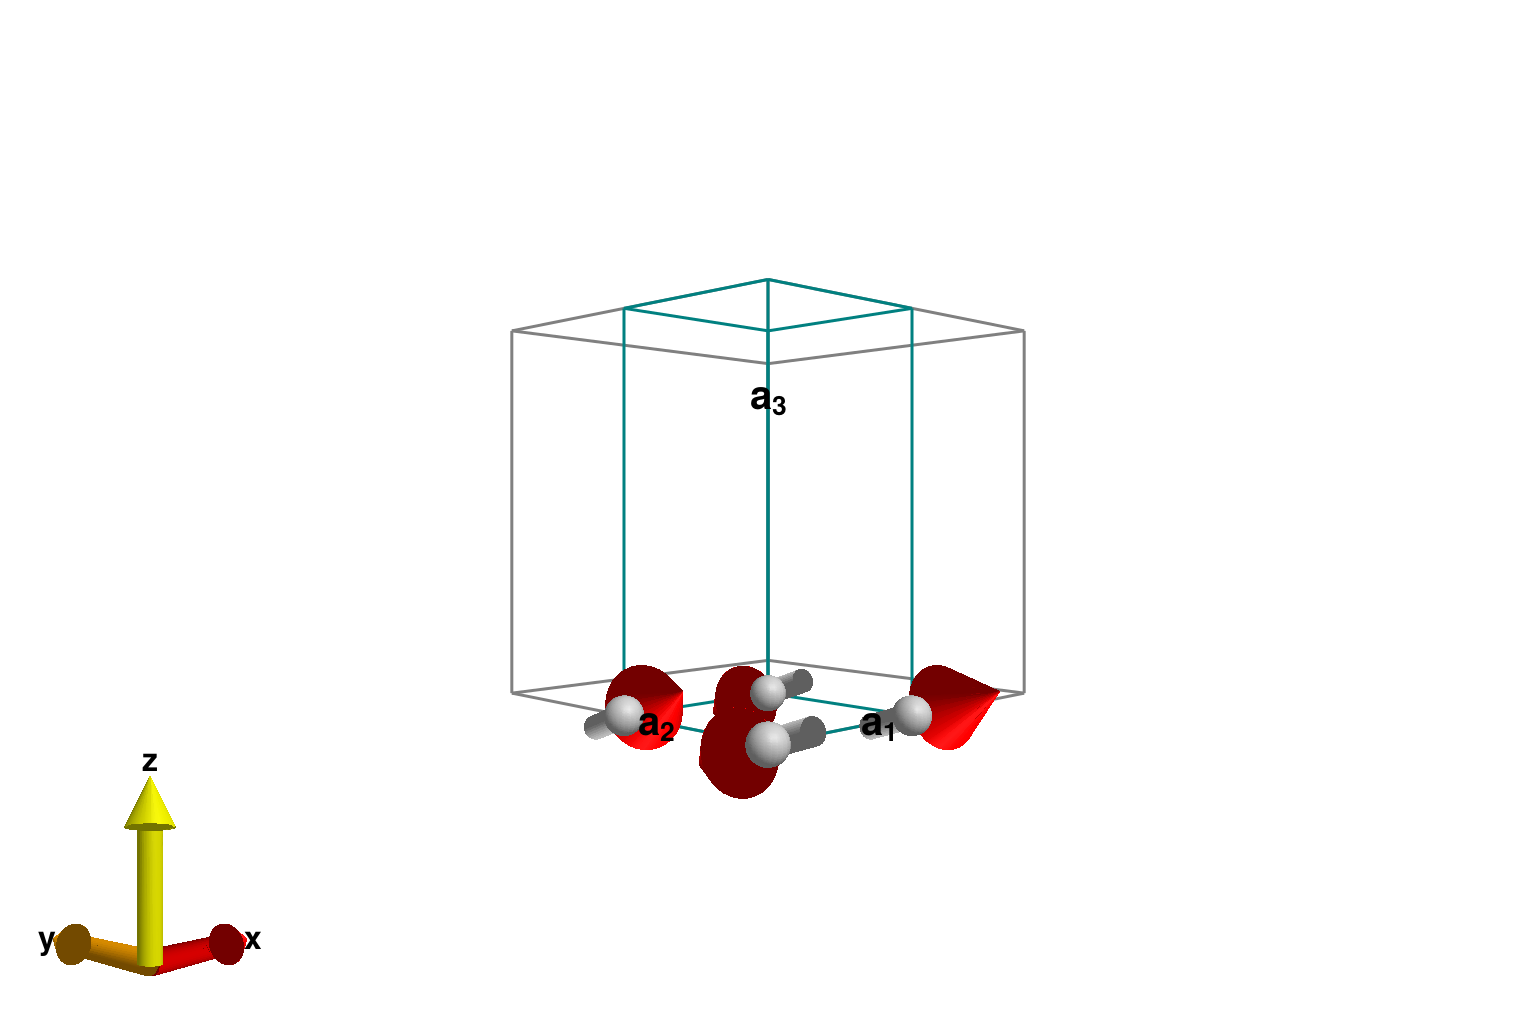

In [9]:
J1=1.0
J2=-0.1
set_exchange!(sys,J1,Bond(1, 1, [1, 0, 0]))
set_exchange!(sys,J2,Bond(1, 1, [1, 1, 0]))
randomize_spins!(sys)
minimize_energy!(sys)
plot_spins(sys)

Create the LSWT object and set up a path. Note that the path goes through the $\Gamma$, $\chi$, M and $\Gamma$ points. Obtain the dispersion and intensity bands.

In [10]:
swt=SpinWaveTheory(sys)
q_points = [[0,0,0], [1/2,0,0], [1/2,1/2,0], [0,0,0]]
density = 50
path, xticks = reciprocal_space_path(cryst, q_points, density);
formula = intensity_formula(swt, :perp; kernel=delta_function_kernel)
disp, intensity = intensities_bands(swt, path, formula);

Plot the dispersion and convoluted spectra.

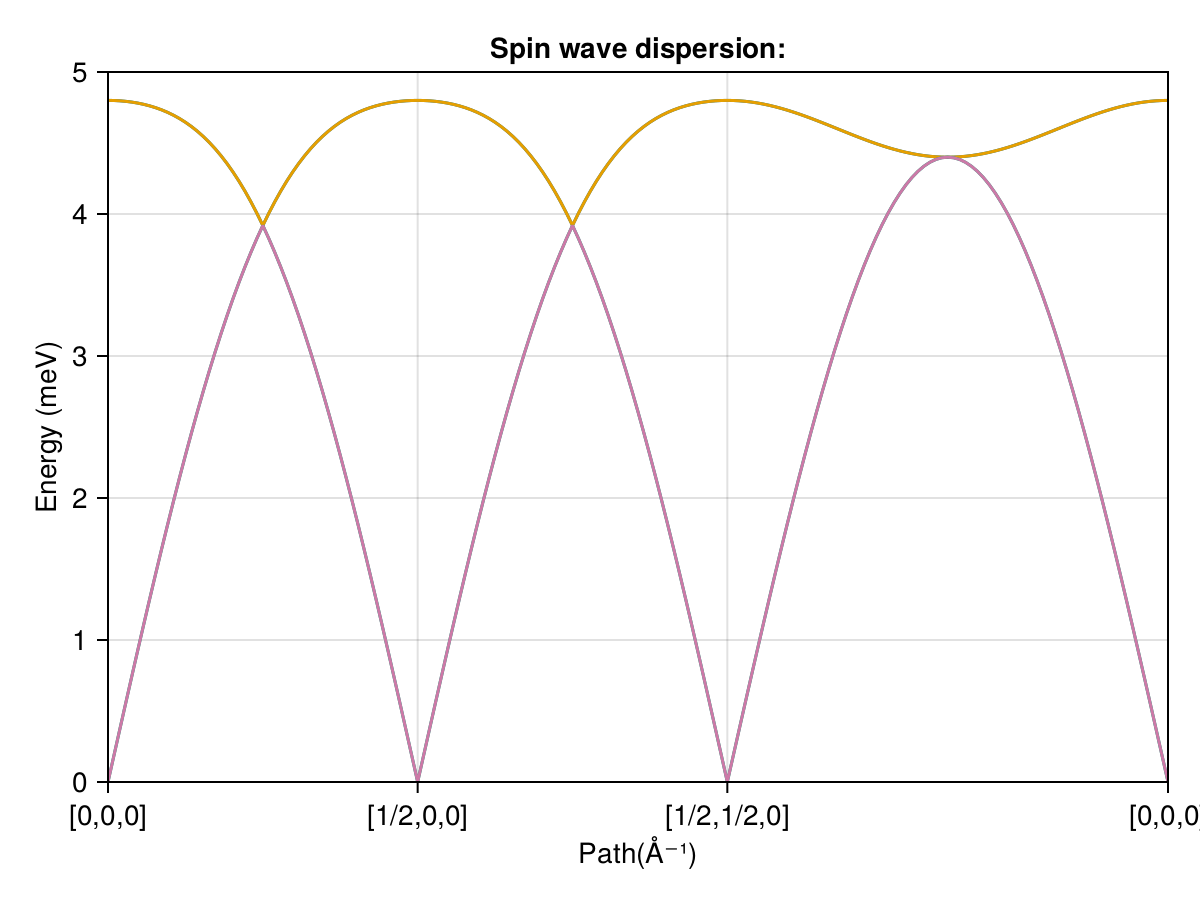

In [11]:
CairoMakie.activate!()
fig = Figure()
ax = Axis(fig[1,1]; xlabel="Path(Å⁻¹)", ylabel="Energy (meV)", title="Spin wave dispersion:", xticks)
ylims!(ax, 0.0, 5.0)
xlims!(ax, 1, size(disp, 1))
colorrange = extrema(intensity)
for i in axes(disp)[2]
    lines!(ax, 1:length(disp[:,i]), disp[:,i];color="black",colorrange)
end
fig


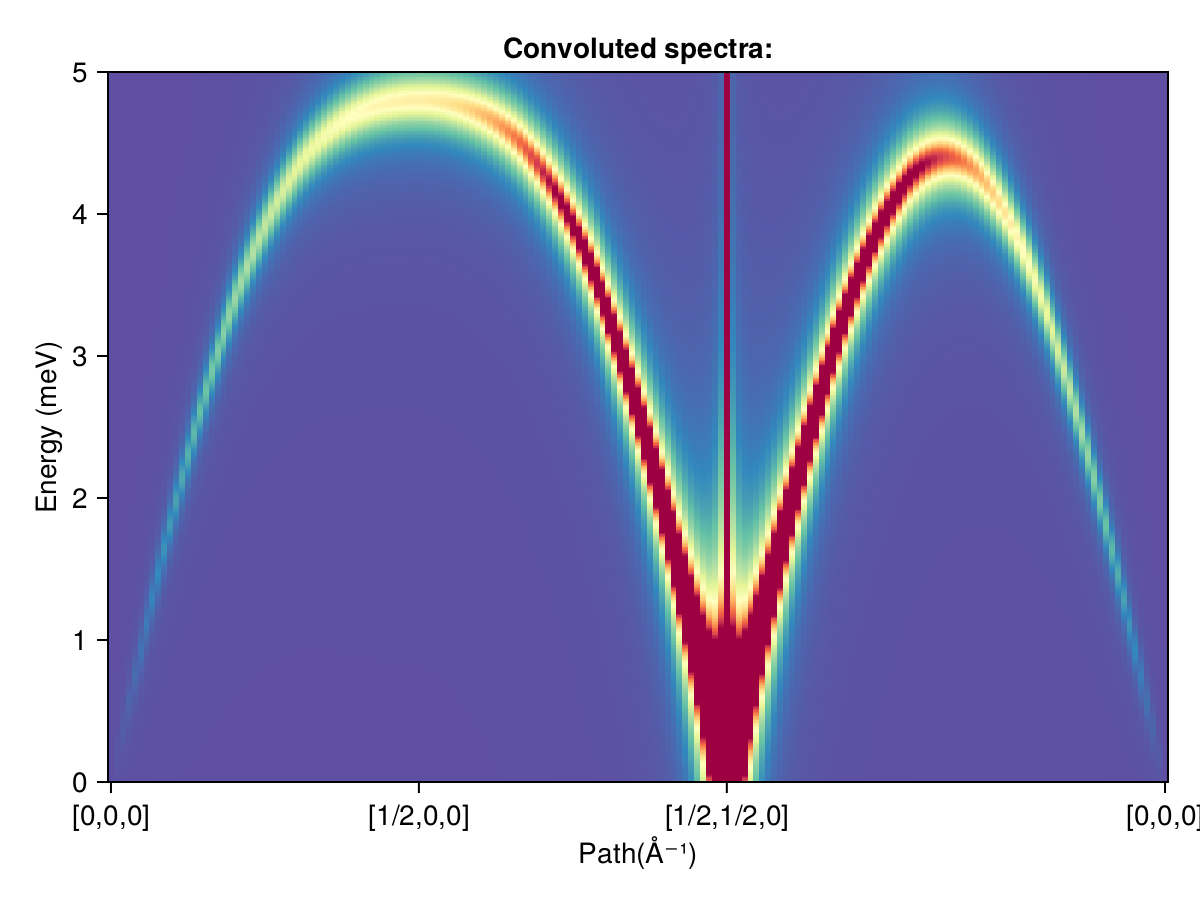

In [12]:
γ = 0.15 
broadened_formula = intensity_formula(swt, :perp; kernel=lorentzian(γ))
energies = collect(0:0.01:10)  
is1 = intensities_broadened(swt, path, energies, broadened_formula);

fig = Figure()
ax = Axis(fig[1,1]; xlabel="Path(Å⁻¹)", ylabel="Energy (meV)", title="Convoluted spectra:", xticks)
ylims!(ax, 0.0, 5.0)
pl=heatmap!(ax, 1:size(is1, 1), energies, is1,colorrange=(0.0,2))
pl.colormap = Reverse(:Spectral)
fig